[*]Init Weights
[W1]=2.1 [W2]=1.0 <noiese>=20
Epoch : 100 [cost]= 187.772 [W1]=2.107 [W2]=1.565 [b]=-1.015
Epoch : 200 [cost]= 187.091 [W1]=2.112 [W2]=1.544 [b]=-1.250
Epoch : 300 [cost]= 186.644 [W1]=2.115 [W2]=1.529 [b]=-1.411
Epoch : 400 [cost]= 186.350 [W1]=2.117 [W2]=1.519 [b]=-1.520
Epoch : 500 [cost]= 186.154 [W1]=2.118 [W2]=1.513 [b]=-1.595
[*]Optimization Finished


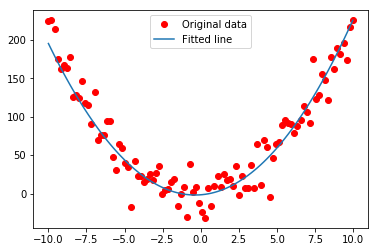

In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class DataSet():

    def __init__(self,seed,n_samples,minx=-10,maxx=10):
        self.seed = seed
        self.data_x = np.linspace(minx,maxx,n_samples)
        self.data_y = []

    def initY(self,w1,w2,b):
        for x in self.data_x:
            self.data_y.append(w1*x*x + w2*x + self.seed.randn()*b)
        

class Model():

    def __init__(self,seed,n_samples,learning_rate):

        self.X = tf.placeholder("float")
        self.Y = tf.placeholder("float")

        self.W1 = tf.Variable(seed.randn(), name='weight1')
        self.W2 = tf.Variable(seed.randn(), name='weight2')
        self.b = tf.Variable(seed.randn(), name='bias')

        poly1 = tf.multiply(tf.pow(self.X,2),self.W1)
        poly2 = tf.multiply(self.X,self.W2)
        pred = tf.add(tf.add(poly1,poly2),self.b)
        self.cost = tf.reduce_sum(tf.pow(pred-self.Y,2))/(2*n_samples) 
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        self.train = optimizer.minimize(self.cost)

    def train_model(self,sess,training_epochs,train_X,train_Y,display_step):

        for epoch in range(training_epochs):
            for (x, y) in zip(train_X, train_Y):
                sess.run(self.train, feed_dict={self.X: x,self.Y: y})

            if (epoch+1) % display_step == 0:
                c = sess.run(self.cost, 
                             feed_dict={self.X: train_X, self.Y:train_Y})
                print("Epoch : {0} [cost]={1:8.3f} [W1]={2:.3f} [W2]={3:.3f} [b]={4:.3f}".format(epoch+1,c,sess.run(self.W1),sess.run(self.W2),sess.run(self.b)))
        print('[*]Optimization Finished')

    def plot_model(self,train_X,train_Y):

        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(self.W1)*train_X*train_X + sess.run(self.W2) * train_X +
                 sess.run(self.b), label='Fitted line')
        plt.legend()
        plt.show()

if __name__=='__main__':

    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
    seed = np.random
    n_samples = 100
    training_epochs = 500
    w1=2.1
    w2=1.0
    noise=20
    
    Mydata = DataSet(seed,n_samples)
    Mydata.initY(w1=w1,w2=w2,b=noise)

    sess = tf.Session()
    Mymodel = Model(seed,n_samples,0.01)
    sess.run(tf.global_variables_initializer())
    print('[*]Init Weights\n[W1]={0} [W2]={1} <noiese>={2}'.format(w1,w2,noise))

    Mymodel.train_model(sess,
                        train_X = Mydata.data_x,
                        train_Y = Mydata.data_y,
                        training_epochs=500,
                        display_step=100)

    Mymodel.plot_model(train_X = Mydata.data_x,
                       train_Y = Mydata.data_y)

